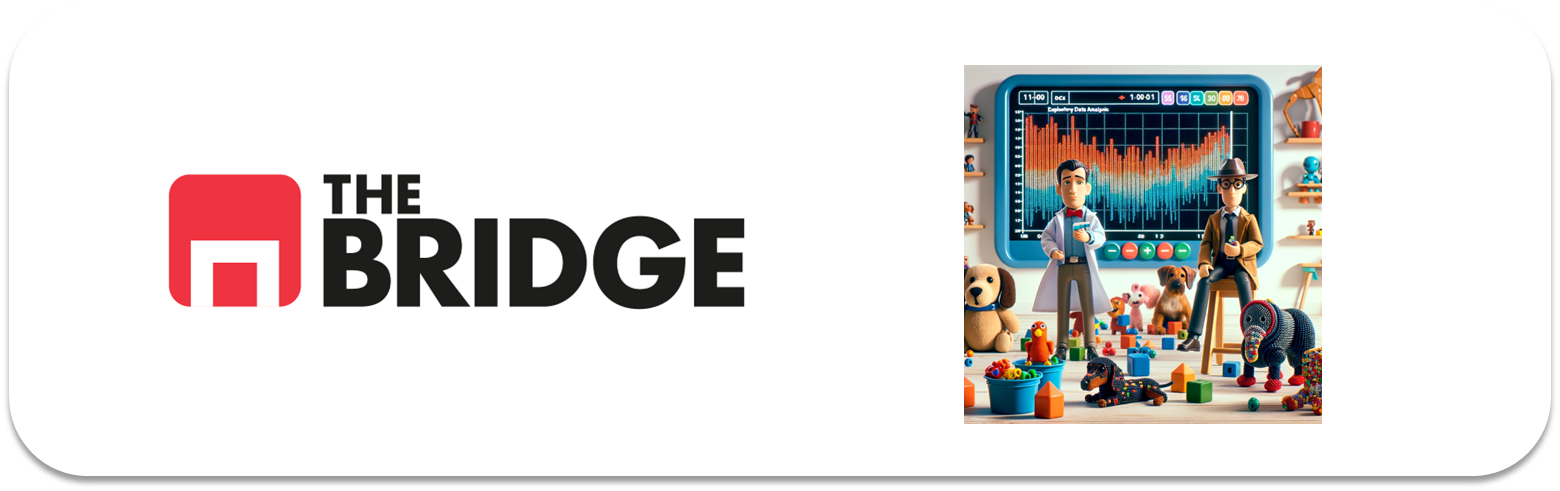

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [4]:
archivo = pd.read_csv(r'C:\DATA_SCIENCE\MASTER DATA SCIENCE\Prácticas Máster Data Science\Practicas_Data_Science\Prácticas Python\Ejercicios Sprint 7 - Análisis explicativo y descriptivo\Unidad_02\Practica_Obligatoria\data\titanic.csv')

df_titanic = archivo.copy()

df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=['deck', 'survived', 'pclass' ])

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [ ]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,1


In [ ]:
df_titanic.drop(columns=['parch', 'sibsp']

df_titanic.head(1)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.0,7.25,S,Third,man,True,NaN,Southampton,no,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [9]:
df_titanic['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [21]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [22]:
df_titanic['age'].mean()

np.float64(29.69911764705882)

In [24]:
age_mean_con_who = df_titanic.groupby("who")["age"].mean()

age_mean_con_who

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [28]:
df_titanic["age"] = df_titanic["age"].fillna(df_titanic.groupby("who")["age"].transform("mean"))

df_titanic.head(10)

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_members
0,0,3,male,22.000000,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.000000,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.000000,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.000000,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.000000,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,33.173123,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.000000,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.000000,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.000000,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
9,1,2,female,14.000000,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Sexo y Supervivencia: Chi-cuadrado = 260.71702016732104, p-valor = 1.1973570627755645e-58
Clase y Supervivencia: Chi-cuadrado = 102.88898875696056, p-valor = 4.549251711298793e-23


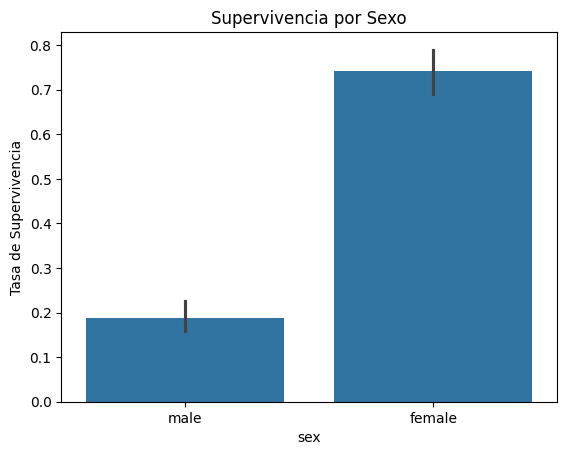

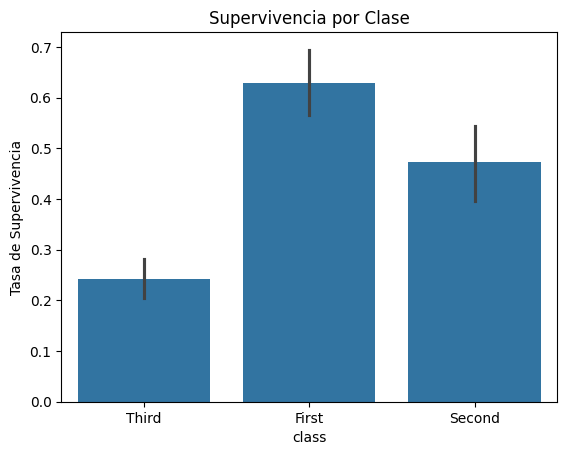

In [6]:
# Convertir alive a binario para facilitar análisis (1 = yes, 0 = no)
df_titanic["survived"] = df_titanic["alive"].map({"yes": 1, "no": 0})

# 1. Relación entre sexo, ser adulto o niño y supervivencia
sex_survival = df_titanic.groupby("sex")["survived"].agg(["sum", "mean"])
who_survival = df_titanic.groupby("who")["survived"].agg(["sum", "mean"])

# Relación entre sexo y supervivencia
contingency_sex = pd.crosstab(df_titanic["sex"], df_titanic["survived"])
sex_test_result = chi2_contingency(contingency_sex)

chi2_sex = sex_test_result[0]  # Valor Chi-cuadrado
p_sex = sex_test_result[1]     # p-valor asociado

# Relación entre clase y supervivencia
contingency_class = pd.crosstab(df_titanic["class"], df_titanic["survived"])
class_test_result = chi2_contingency(contingency_class)

chi2_class = class_test_result[0]  # Valor Chi-cuadrado
p_class = class_test_result[1]     # p-valor asociado

# Mostrar resultados más explícitos
print(f"Sexo y Supervivencia: Chi-cuadrado = {chi2_sex}, p-valor = {p_sex}")
print(f"Clase y Supervivencia: Chi-cuadrado = {chi2_class}, p-valor = {p_class}")

# Visualizaciones clave
# Relación entre sexo y supervivencia
sns.barplot(data=df_titanic, x="sex", y="survived")
plt.title("Supervivencia por Sexo")
plt.ylabel("Tasa de Supervivencia")
plt.show()

# Relación entre clase y supervivencia
sns.barplot(data=df_titanic, x="class", y="survived")
plt.title("Supervivencia por Clase")
plt.ylabel("Tasa de Supervivencia")
plt.show()

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [7]:
archivo_viajes = pd.read_csv(r'C:\DATA_SCIENCE\MASTER DATA SCIENCE\Prácticas Máster Data Science\Practicas_Data_Science\Prácticas Python\Ejercicios Sprint 7 - Análisis explicativo y descriptivo\Unidad_02\Practica_Obligatoria\data\dataset_viajes_jun23.csv')

df_viajes = archivo_viajes.copy()

df_viajes.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

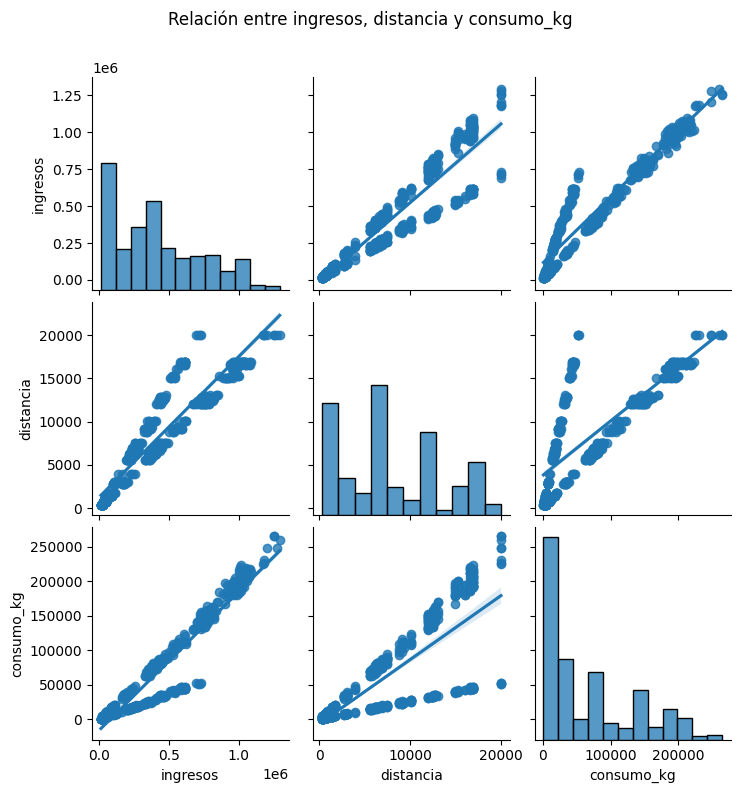

,ingresos,distancia,consumo_kg
ingresos,1.000000,0.928833,0.944875
distancia,0.928833,1.000000,0.762341
consumo_kg,0.944875,0.762341,1.000000


In [12]:
# 1. Calcular correlaciones
correlacion = df_viajes[["ingresos", "distancia", "consumo_kg"]].corr()

# 2. Gráficos de dispersión para visualizar relaciones
sns.pairplot(df_viajes, vars=["ingresos", "distancia", "consumo_kg"], kind="reg")
plt.suptitle("Relación entre ingresos, distancia y consumo_kg", y=1.05)
plt.show()

# Mostrar matriz de correlación
correlacion

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_21588\996523899.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_summary = df_viajes.groupby("cat_vuelo")[["distancia"]].agg(["min", "max"])
C:\Users\Joaquín\AppData\Local\Temp\ipykernel_21588\996523899.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_viajes, x="cat_vuelo", y="ingresos", kind="bar", ci=None)


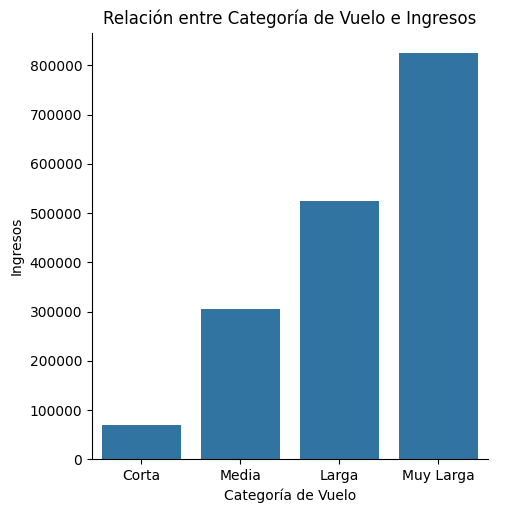

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_21588\996523899.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_viajes, x="cat_vuelo", y="consumo_kg", kind="bar", ci=None)


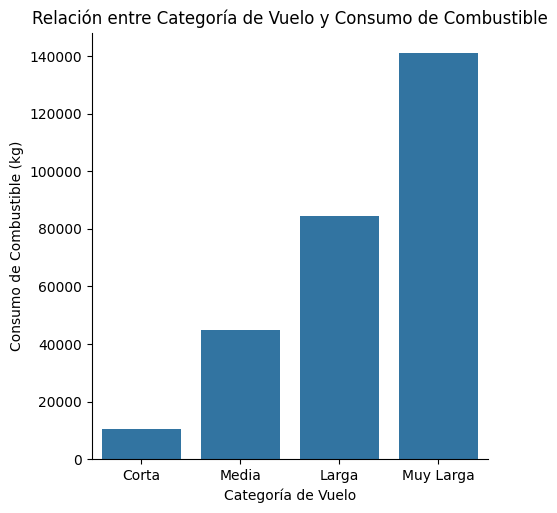

In [13]:
# Crear la variable categórica "cat_vuelo" basada en los valores de "distancia"
# Dividir "distancia" en 4 categorías aproximadamente iguales usando cuantiles
df_viajes["cat_vuelo"] = pd.qcut(df_viajes["distancia"], q=4, labels=["Corta", "Media", "Larga", "Muy Larga"])

# Mostrar las categorías creadas
categories_summary = df_viajes.groupby("cat_vuelo")[["distancia"]].agg(["min", "max"])

# Análisis multivariante con la nueva variable categórica
# Gráfico de relación entre "cat_vuelo", "ingresos", y "consumo_kg"
sns.catplot(data=df_viajes, x="cat_vuelo", y="ingresos", kind="bar", ci=None)
plt.title("Relación entre Categoría de Vuelo e Ingresos")
plt.ylabel("Ingresos")
plt.xlabel("Categoría de Vuelo")
plt.show()

sns.catplot(data=df_viajes, x="cat_vuelo", y="consumo_kg", kind="bar", ci=None)
plt.title("Relación entre Categoría de Vuelo y Consumo de Combustible")
plt.ylabel("Consumo de Combustible (kg)")
plt.xlabel("Categoría de Vuelo")
plt.show()

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

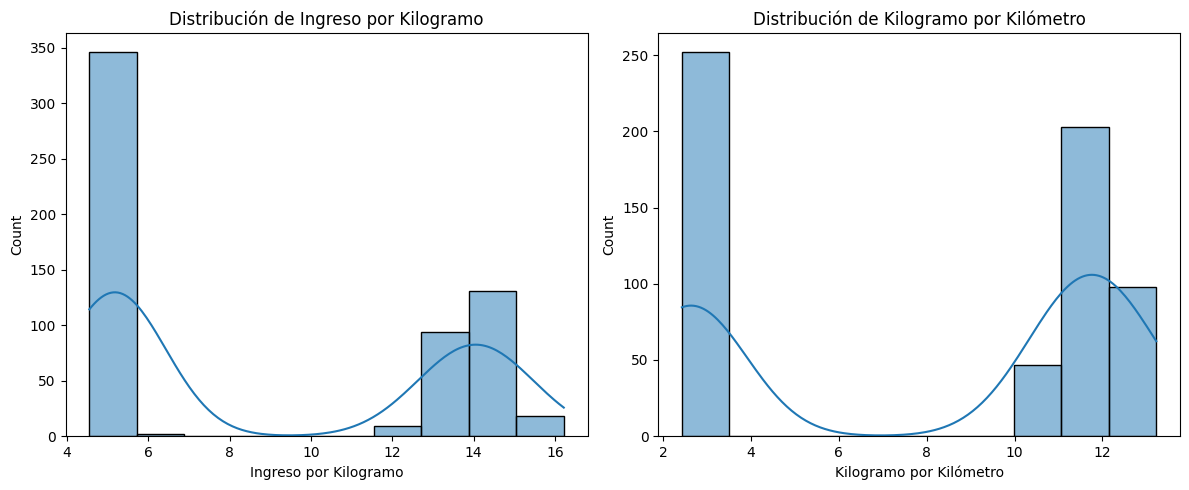

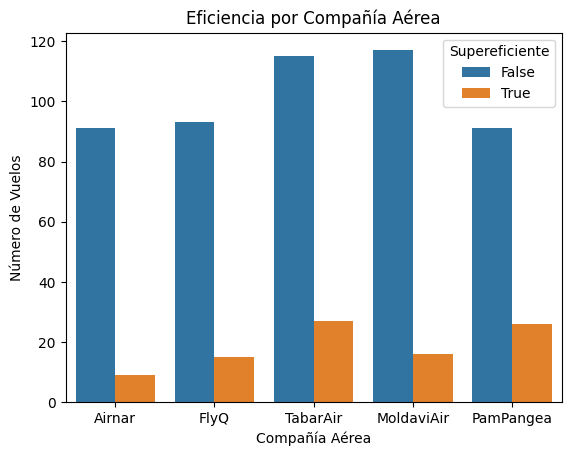

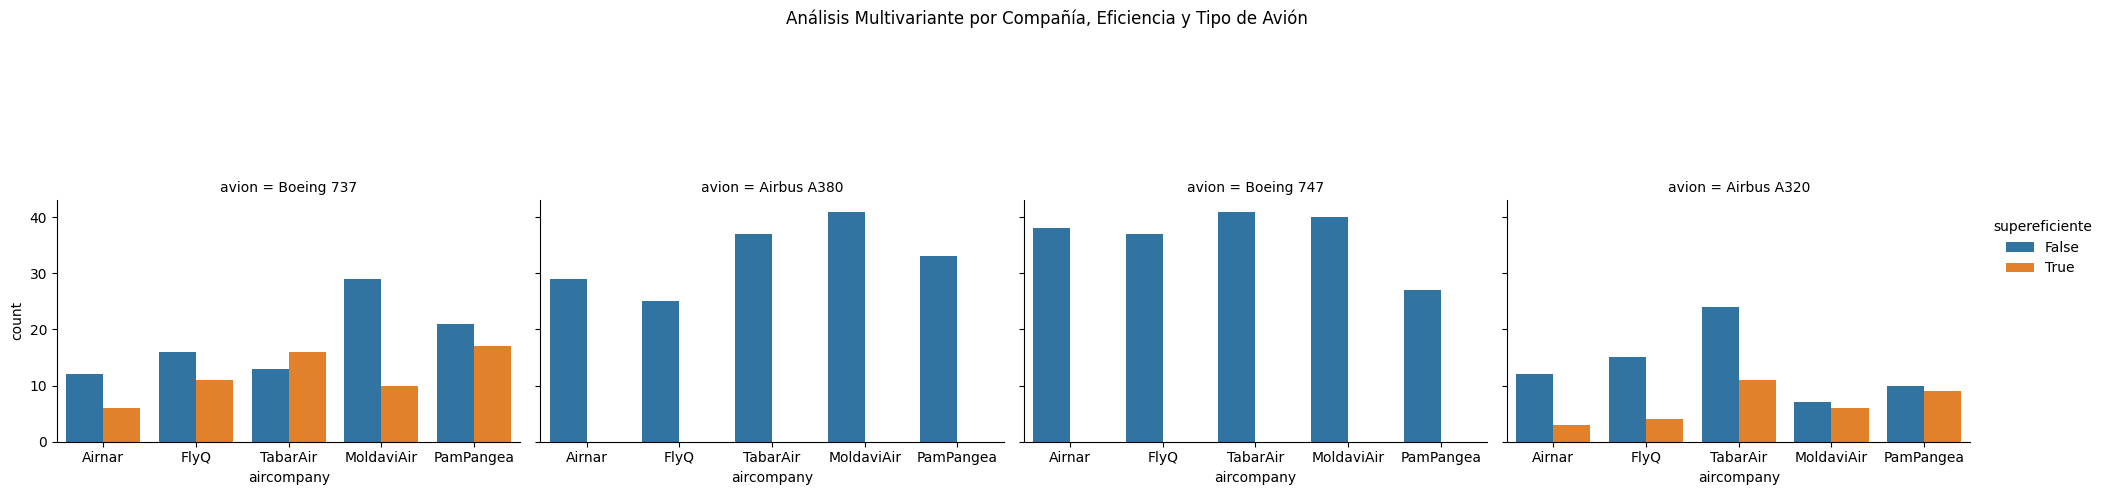

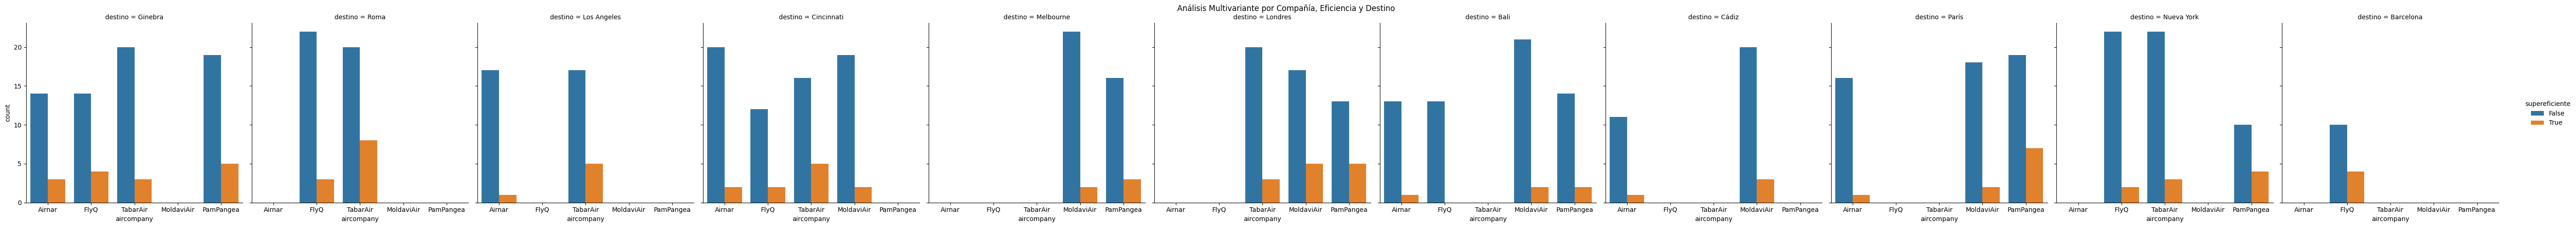

In [20]:
# Crear las nuevas variables relacionadas con la eficiencia
df_viajes["ingreso_por_kg"] = df_viajes["ingresos"] / df_viajes["consumo_kg"]  # Ingreso por kilogramo consumido
df_viajes["kg_por_km"] = df_viajes["consumo_kg"] / df_viajes["distancia"]      # Kilogramo consumido por kilómetro

# Análisis univariante: histogramas de las nuevas variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_viajes["ingreso_por_kg"], bins=10, kde=True)
plt.title("Distribución de Ingreso por Kilogramo")
plt.xlabel("Ingreso por Kilogramo")

plt.subplot(1, 2, 2)
sns.histplot(df_viajes["kg_por_km"], bins=10, kde=True)
plt.title("Distribución de Kilogramo por Kilómetro")
plt.xlabel("Kilogramo por Kilómetro")

plt.tight_layout()
plt.show()

# Fijar umbral para indicar si un viaje es supereficiente o no
umbral_ingreso_eficiente = df_viajes["ingreso_por_kg"].quantile(0.75)  # Cuartil superior
umbral_consumo_eficiente = df_viajes["kg_por_km"].quantile(0.25)       # Cuartil inferior

# Crear variable binaria de eficiencia
df_viajes["supereficiente"] = (df_viajes["ingreso_por_kg"] >= umbral_ingreso_eficiente) & \
                              (df_viajes["kg_por_km"] <= umbral_consumo_eficiente)

# Análisis bivariante entre eficiencia y compañías aéreas
sns.countplot(data=df_viajes, x="aircompany", hue="supereficiente")
plt.title("Eficiencia por Compañía Aérea")
plt.xlabel("Compañía Aérea")
plt.ylabel("Número de Vuelos")
plt.legend(title="Supereficiente")
plt.show()

# Análisis multivariante con eficiencia, tipo de avión y destino
sns.catplot(data=df_viajes, x="aircompany", hue="supereficiente", col="avion", kind="count")
plt.subplots_adjust(top=0.6)
plt.suptitle("Análisis Multivariante por Compañía, Eficiencia y Tipo de Avión")
plt.show()

sns.catplot(data=df_viajes, x="aircompany", hue="supereficiente", col="destino", kind="count")
plt.subplots_adjust(top=0.9)
plt.suptitle("Análisis Multivariante por Compañía, Eficiencia y Destino")
plt.show()

# Mostrar resumen final del DataFrame
df_viajes_summary = df_viajes.groupby(["aircompany", "supereficiente"]).agg(
    ingresos_totales=("ingresos", "sum"),
    consumo_total=("consumo_kg", "sum"),
    numero_vuelos=("id_vuelo", "count")
)

